#### Question 1

In sci-kit learn, the LogisticRegression class includes the following parameters:

- **C**: The inverse of regularization strength. A smaller value of **C** implies stronger regularization, which prevents overfitting.

- **solver**: The optimization algorithm used for training. Common solvers include **liblinear**, **lbfgs**, **saga**, etc.

- **penalty**: The type of regularization applied. **l1** represents Lasso regularization, which leads to feature selection, while **l2** represents Ridge regularization, which prevents large coefficients.

- **multi_class**: Specifies the strategy for handling multiple classes. **ovr (one-vs-rest)** trains separate binary classifiers for each class, while **multinomial** considers all classes simultaneously.

#### Question 2

The **penalty** parameter in **LogisticRegression** specifies the type of regularization:

- **l1 penalty (Lasso Regularization)**: Encourages sparsity by shrinking some feature coefficients to zero, effectively selecting important features.
- **l2 penalty (Ridge Regularization)**: Penalizes large coefficients but does not force them to zero, keeping all features but reducing their impact.

#### Question 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# loading the iris dataset

iris = datasets.load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [179]:
X, y = iris.data, iris.target

In [180]:
X.shape, y.shape

((150, 4), (150,))

In [270]:
def tune_reg(penalty, c_values=10.0 ** np.arange(5, -5, -1)):
    norm_base = 0  # store norm of first model for normalization
    petal_len_0, petal_width_0, petal_len_2, petal_width_2 = np.zeros((4, len(c_values)))
    norm_ratios = np.zeros(len(c_values))

    for i, c in enumerate(c_values):
        model = LogisticRegression(penalty=penalty, solver='liblinear', C=c, multi_class='ovr')
        model.fit(X, y)

        if i == 0:
            norm_base = np.linalg.norm(model.coef_)

        norm_ratios[i] = np.linalg.norm(model.coef_) / norm_base
        petal_len_0[i] = model.coef_[0, -2]
        petal_width_0[i] = model.coef_[0, -1]
        petal_len_2[i] = model.coef_[2, -2]
        petal_width_2[i] = model.coef_[2, -1]

    return c_values, norm_ratios, petal_len_0, petal_width_0, petal_len_2, petal_width_2

In [271]:
c_values, norm_ratios_l1, petal_len_0, petal_width_0, petal_len_2, petal_width_2 = tune_reg('l1')

C:\Users\Daphne\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


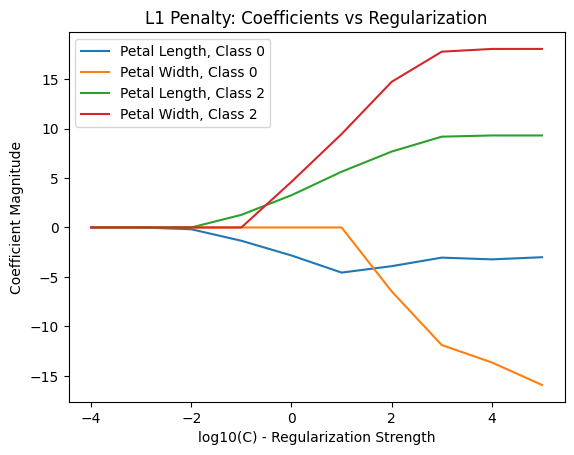

In [272]:
plt.plot(np.log10(c_values), petal_len_0, label="Petal Length, Class 0")
plt.plot(np.log10(c_values), petal_width_0, label="Petal Width, Class 0")
plt.plot(np.log10(c_values), petal_len_2, label="Petal Length, Class 2")
plt.plot(np.log10(c_values), petal_width_2, label="Petal Width, Class 2")
plt.xlabel("log10(C) - Regularization Strength")
plt.ylabel("Coefficient Magnitude")
plt.title("L1 Penalty: Coefficients vs Regularization")
plt.legend()
plt.show()

In [273]:
c_values, norm_ratios_l2, petal_len_0, petal_width_0, petal_len_2, petal_width_2 = tune_reg("l2")

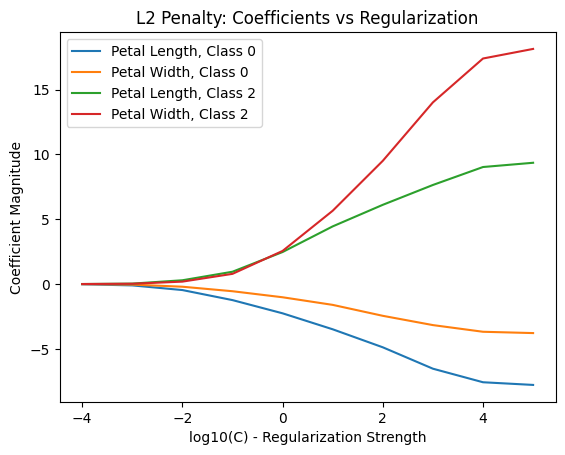

In [274]:
plt.plot(np.log10(c_values), petal_len_0, label="Petal Length, Class 0")
plt.plot(np.log10(c_values), petal_width_0, label="Petal Width, Class 0")
plt.plot(np.log10(c_values), petal_len_2, label="Petal Length, Class 2")
plt.plot(np.log10(c_values), petal_width_2, label="Petal Width, Class 2")
plt.xlabel("log10(C) - Regularization Strength")
plt.ylabel("Coefficient Magnitude")
plt.title("L2 Penalty: Coefficients vs Regularization")
plt.legend()
plt.show()

For the L1 penalty graph, I noticed that some coefficients become exactly zero at low values of C (strong regularization), meaning that certain features are eliminated. At high values of C (low regularization), some coefficients take on much lower negative values, while others increase signficantly in magnitude. This suggests to me that L1 penalty enforces feature selection, allowing certain features to dominate while others are removed entirely. Unlike L2 regularization, the coefficients in L1 regularization do not shrink smoothly and instead drop abruptly to zero at certain points. Some coefficients experience sharp negative shifts, while others grow positively as C increases. 


For the L2 penalty graph, I noticed that unlike L1 regularization, no coefficients become exactly zero. Instead, as C decreases (stronger regularization), all coefficients gradually shrink towards zero, but none are eliminated. I also observed that the weight coefficients decrease smoothly as regularization increases, which is due to the fact that the L2 penalty applies a squared penalty on coefficients, preventing sudden drops and ensuring stability. 

Overall, I noticed that the L1 regularization creates sparsity, with coefficients dropping to zero at different regularization strengths, whereas L2 regularization reduces overfitting by shrinking all coefficients smoothly rather than eliminating them. The L1 penalty leads to more abrupt changes in the coefficient values, while the L2 penalty produces continuous trends. Lastly, using the log(C) scale helped to more clearly show coefficients behaved under different levels of regularization for both L1 and L2 penalties. 

#### Question 4

In [275]:
c_values, norm_ratios_l1, petal_len_0, petal_width_0, petal_len_2, petal_width_2 = tune_reg("l1")


C:\Users\Daphne\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Daphne\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


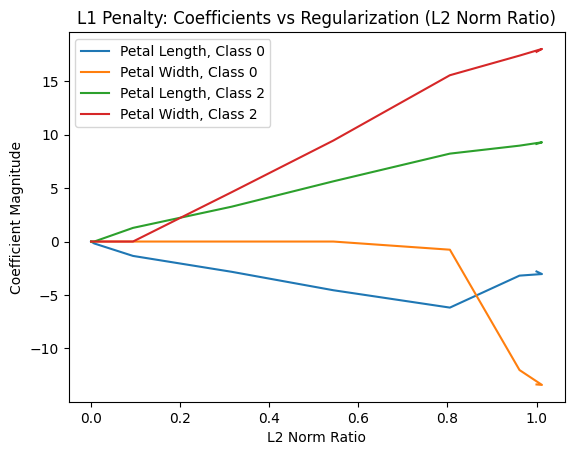

In [276]:
plt.plot(norm_ratios_l1, petal_len_0, label="Petal Length, Class 0")
plt.plot(norm_ratios_l1, petal_width_0, label="Petal Width, Class 0")
plt.plot(norm_ratios_l1, petal_len_2, label="Petal Length, Class 2")
plt.plot(norm_ratios_l1, petal_width_2, label="Petal Width, Class 2")
plt.xlabel("L2 Norm Ratio")
plt.ylabel("Coefficient Magnitude")
plt.title("L1 Penalty: Coefficients vs Regularization (L2 Norm Ratio)")
plt.legend()
plt.show()

In [277]:
c_values, norm_ratios_l2, petal_len_0, petal_width_0, petal_len_2, petal_width_2 = tune_reg("l2")

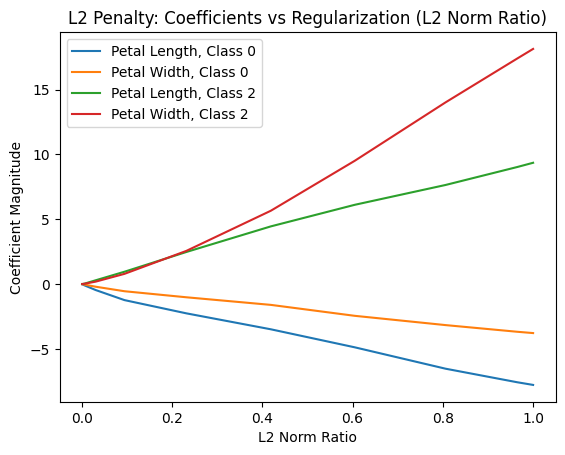

In [278]:
plt.plot(norm_ratios_l2, petal_len_0, label="Petal Length, Class 0")
plt.plot(norm_ratios_l2, petal_width_0, label="Petal Width, Class 0")
plt.plot(norm_ratios_l2, petal_len_2, label="Petal Length, Class 2")
plt.plot(norm_ratios_l2, petal_width_2, label="Petal Width, Class 2")
plt.xlabel("L2 Norm Ratio")
plt.ylabel("Coefficient Magnitude")
plt.title("L2 Penalty: Coefficients vs Regularization (L2 Norm Ratio)")
plt.legend()
plt.show()

In L1 penalty graph for this section, I observed that as the L2 norm ratio increases, some coefficients remain at zero for a longer period before suddenly increasing or decreasing sharply. This behavior therefore confirms that L1 regularization promotes sparsity, as certain features remain completely eliminated (zero coefficient) until regularization weakens. Some coefficients drop to negative values more abruptly, while others increase rapidly, which again reinforces the idea that L1 penalty enforces feature selection by allowing only a subset of coefficients to remain active at certain regularization strengths. 

In the L2 penalty graph, I noticed that no coefficients become exactly zero. Instead, as the L2 norm ratio increases, all coefficients gradually increase or decrease, maintaining a smooth transition rather than the sudden shifts we observe in L1. This behavior confirms that L2 regularization discourages large coefficients but does not eliminate them entirely, preventing overfitting by applying a squared penalty that shrinks all coefficients rather than setting some to zero. 

Overall, plotting against the L2 norm ratio instead of the C allowed me to see that the L1 penalty creates sharp, sudden changes in coefficients, while the L2 penalty results in continuous, smooth reductions or increases in magnitude. These graphs show how L1 selects only a few features while L2 keeps all features but reduces their impact, which highlights the fundamental differences in how L1 versus L2 regularization techniques behave. 